## Exploratory Data Analysis (EDA) on Student Academic Performance

Roadmap:
* Problem Statement 
* Data Collection
* Data Quality Check
* Data Exploration (Visualization)
* Conclusion

### 1. Problem Statement 
    How student academic performance, as measured by test scores in math, reading, and writing, is affected by gender, race/ethnicity, parental education level, lunch, and test preparation courses.

### 2. Data Collection

   * Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### 2.1. Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data to pandas dataframe
df = pd.read_csv('data/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# 8 col and 1,000 rows
df.shape

(1000, 8)

#### 2.2. Dataset Information

   * gender: male or female
   * race_ethnicity: Group A, B,C, D,E
   * parental_level_of_education: bachelor's degree, some college, master's degree, associate's degree, high school
   * lunch: having lunch before test --> (standard or free/reduced)
   * test_preparation_course: complete or not complete before test
   * math score (out of 100)
   * reading score (out of 100)
   * writing score (out of 100)

### 3. Data Quality Check + Handling

   * Missing Value
   * Duplicates
   * Data Type
   * Number of Unique Values in Each Column
   * Dataset Statistics
   * Check Categories in Each Column
   * Outlier Detection
   * Data Distribution

#### 3.1. Check Missing Value

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### 3.2. Check Duplicate

In [8]:
df.duplicated().sum()

0

#### 3.3. Check Data Types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4. Check unique values in column 

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5. Check Dataset Statistics

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights
   * Similar averages across the three subjects with reading being highest average (69.17) and math being the lowest (66.09)
   * Standard deviation similar across the board --> similar variability in student performance for the three subjects
   * Quartile analysis --> the distribution is not heavily skewed for each of the three subject scores.
   * Ranges for all three are wide: math (0-100), reading (17-100), writing (10-100)

#### 3.6. Data Exploration

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
print("Categories in 'gender' variable:                   {}".format(df['gender'].unique()))
print("Categories in 'race/ethnicity' variable:           {}".format(df['race/ethnicity'].unique()))
print("Categories in 'parental level of education' variable: {}".format(df['parental level of education'].unique()))
print("Categories in 'lunch' variable:                    {}".format(df['lunch'].unique()))
print("Categories in 'test preparation course' variable:  {}".format(df['test preparation course'].unique()))

Categories in 'gender' variable:                   ['female' 'male']
Categories in 'race/ethnicity' variable:           ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:                    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


#### 3.8. Appending Columns for "Total Score" and "Average"

In [31]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Number of students with full mark for each subject exam

In [36]:
reading_full_mark = df[df['reading score'] == 100]['average'].count()
writing_full_mark = df[df['writing score'] == 100]['average'].count()
math_full_mark = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full_mark}')
print(f'Number of students with full marks in Writing: {writing_full_mark}')
print(f'Number of students with full marks in Reading: {reading_full_mark}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [37]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights
   * More students got full marks (100 score) on the reading exam out of the three subjects.
   * More students performed the worse (<20 score) on the math exam out of the three subjects.

### 4. Data Visualization

#### 4.1. Histogram and Boxplot
* Performance averages by gender
* Kernel Distribution Function (KDE)

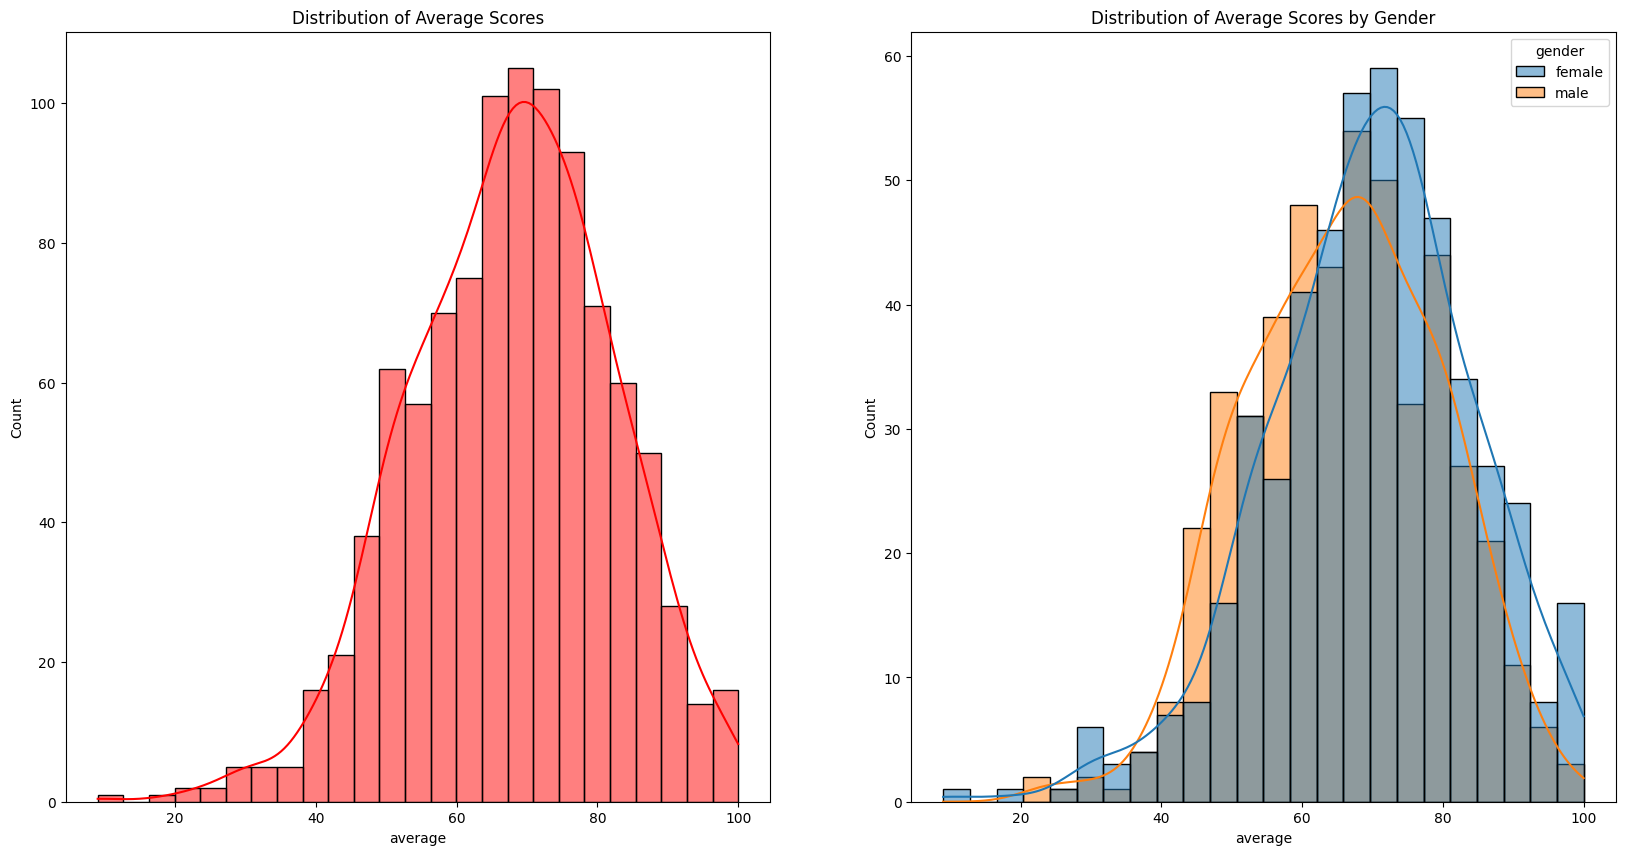

In [100]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=25,kde=True,color='r').set_title('Distribution of Average Scores')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender').set_title('Distribution of Average Scores by Gender')

plt.show()

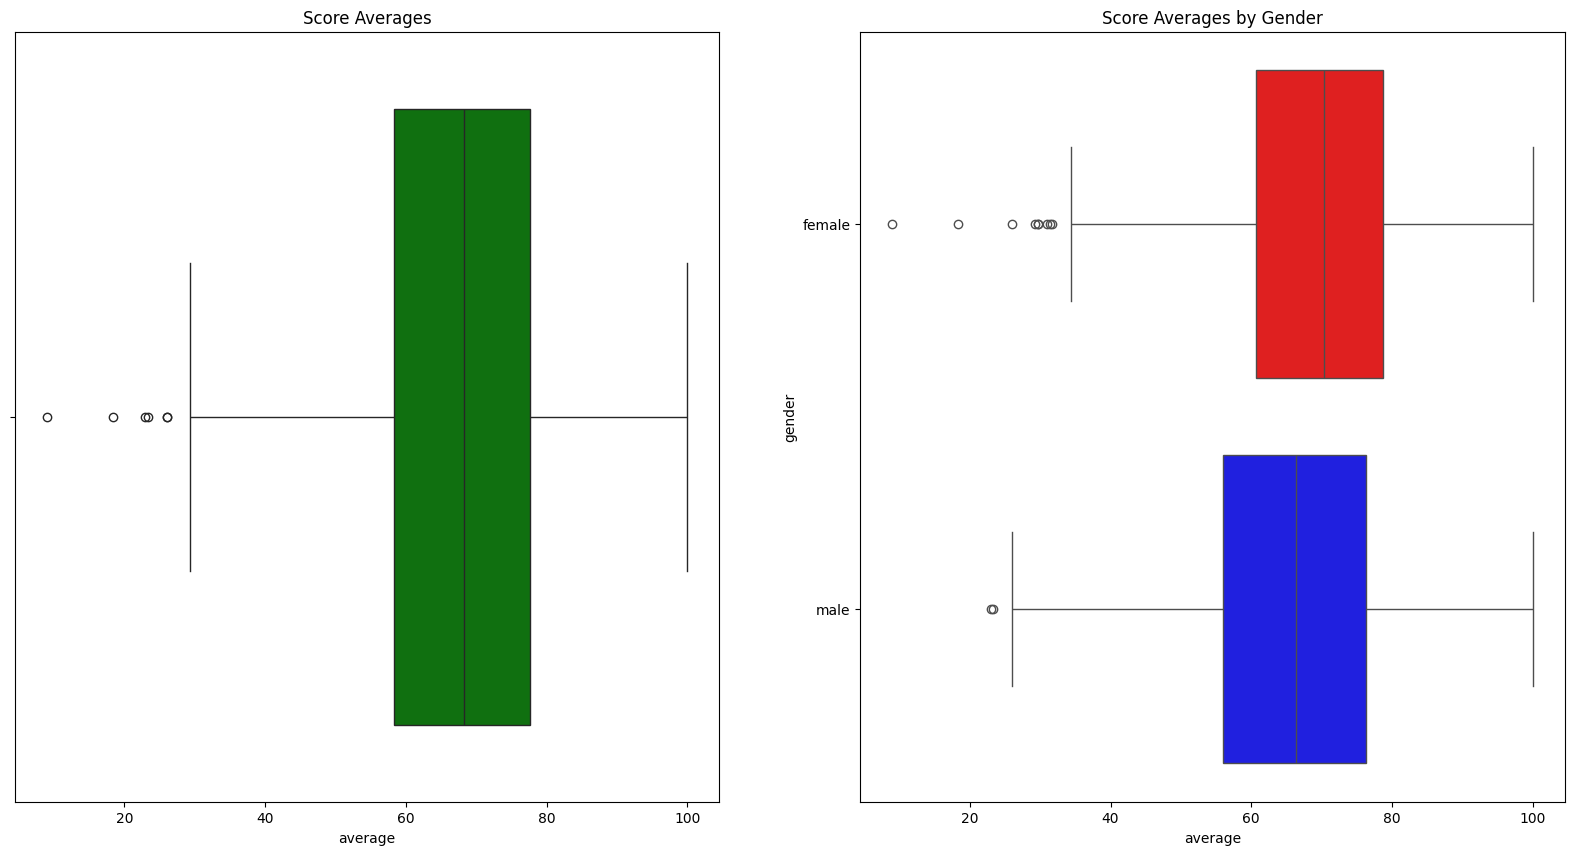

In [98]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(121)
sns.boxplot(data=df, x='average', color='g').set_title('Score Averages')
plt.subplot(122)
sns.boxplot(data=df, x='average', y='gender', palette=['r','b']).set_title('Score Averages by Gender')

plt.show()

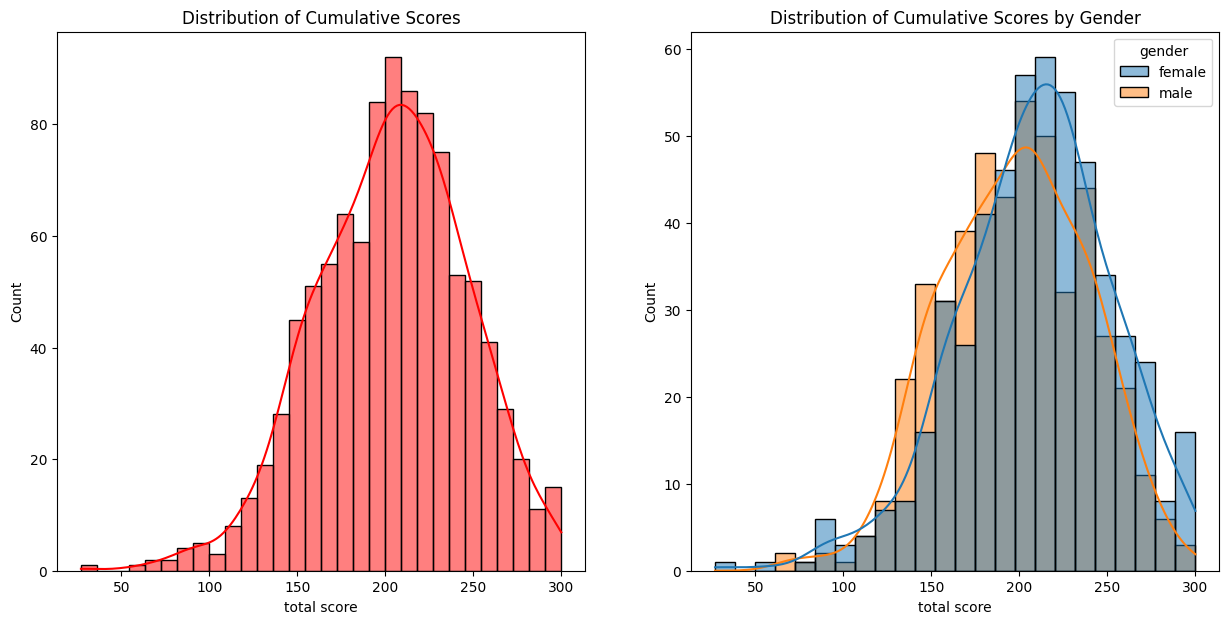

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='r').set_title('Distribution of Cumulative Scores')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender').set_title('Distribution of Cumulative Scores by Gender')
plt.show()

#### Insights
* Females tend to score higher than male students under the following metrics:
  * Cumulative scores across three subject exams 
  * Average of the three subject exam scores

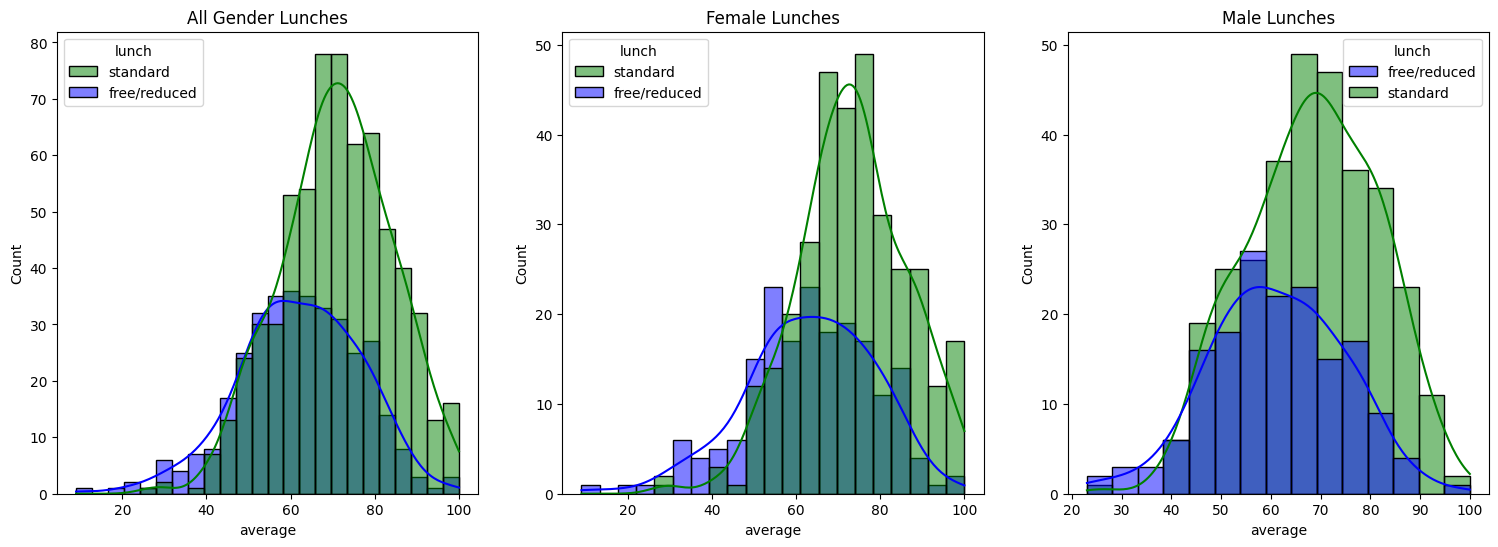

In [95]:
plt.subplots(1,3,figsize=(25,6))
hue_order = ['standard', 'free']
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch', palette=['g','b']).set_title('All Gender Lunches')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch', palette=['g','b']).set_title('Female Lunches')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch', palette=['b','g']).set_title('Male Lunches')
plt.show()

#### Insights
* Students with standard lunches had a higher average performance score than students on free/reduced lunches
  * Result is independent of student's gender

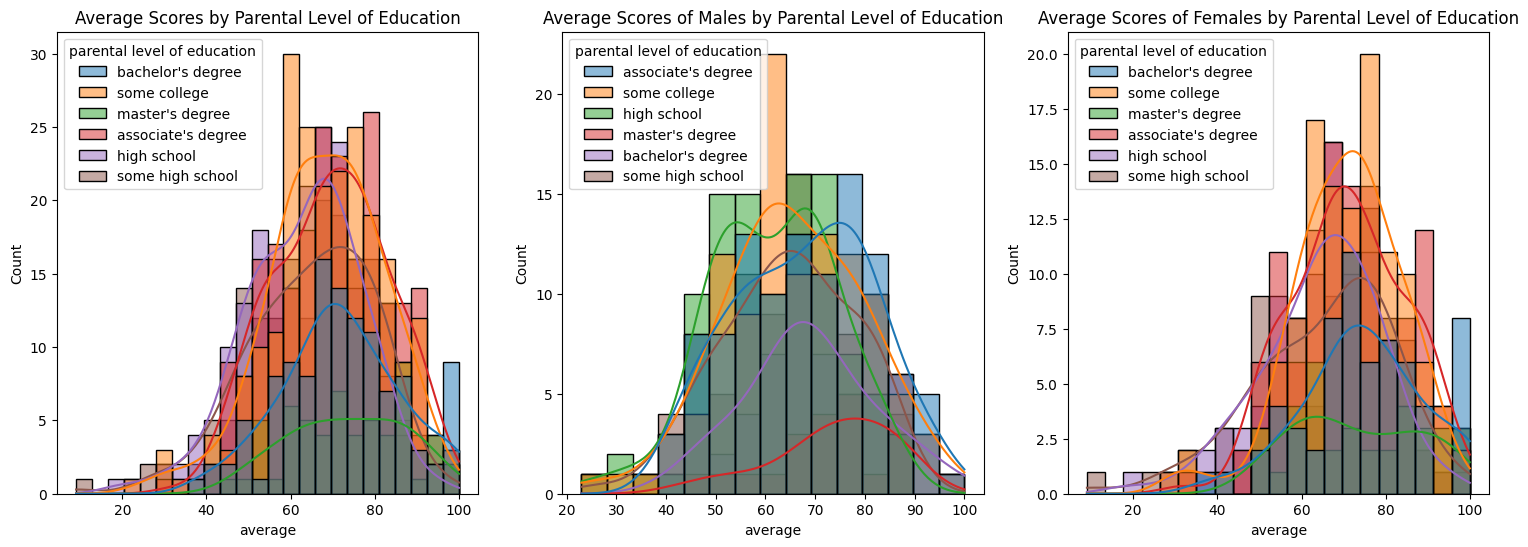

In [101]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education').set_title('Average Scores by Parental Level of Education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education').set_title('Average Scores of Males by Parental Level of Education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education').set_title('Average Scores of Females by Parental Level of Education')
plt.show()

#### It is difficult to draw clear conclusions from the histogram distributions because the data is too convoluted, so we can employ some of the following strategies:
* reduce the problem by comparing only one of the parental level of education to another. 
* compare the parental level of education categories with the greatest counts in average scores above 85 (arbitrary threshold).
* compare the relative proportion of student counts who scored above 85 for each parental level of education categories 

Example

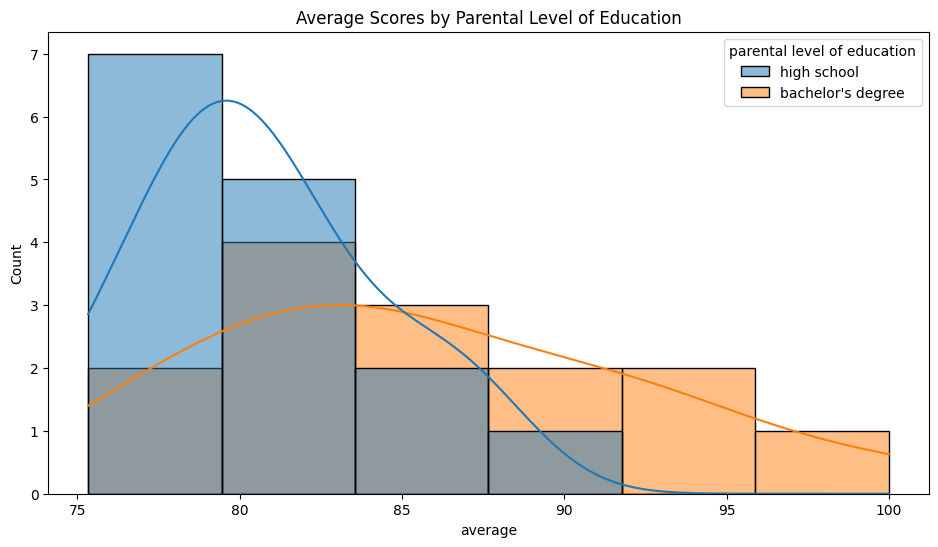

In [123]:
df0 = df[(df['gender'] == 'male') & ((df['parental level of education'] == 'high school') | (df['parental level of education'] == "bachelor's degree")) & (df['average'] > 75)]

plt.subplots(1,1,figsize=(25,6))
plt.subplot(121)
ax =sns.histplot(data=df0,x='average',kde=True,hue='parental level of education').set_title('Average Scores by Parental Level of Education')
plt.show()

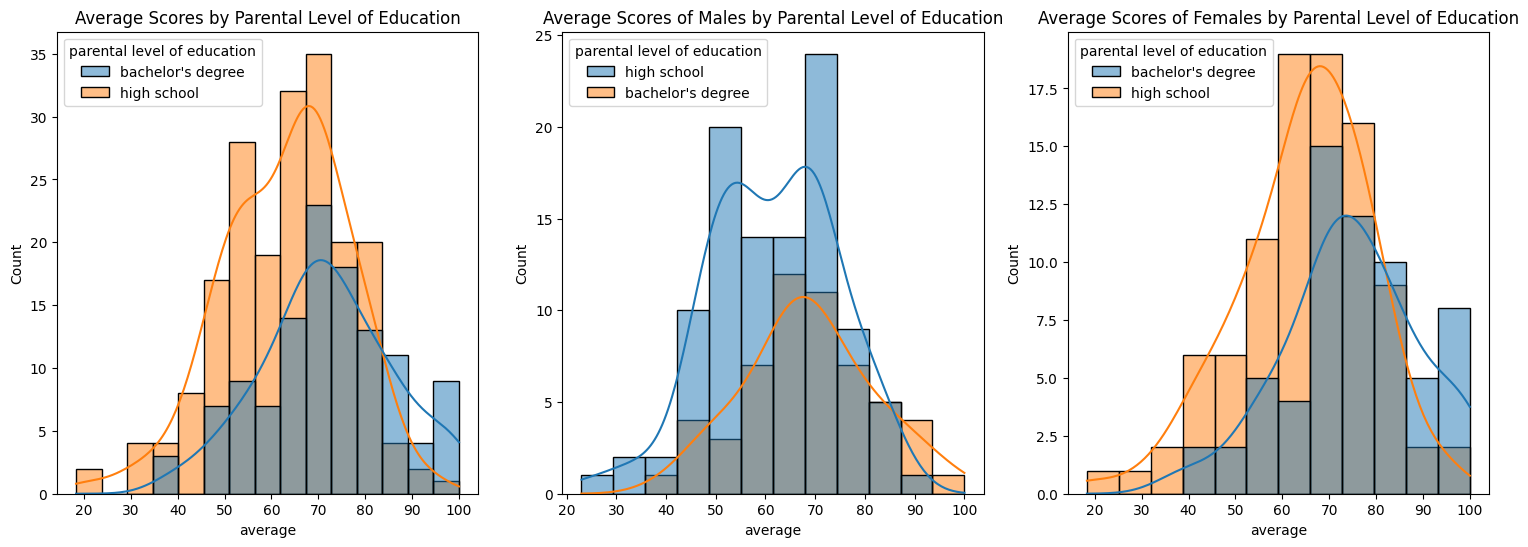

In [134]:
df1 = df[(df['gender'] == 'male') & ((df['parental level of education'] == 'high school') | (df['parental level of education'] == "bachelor's degree"))]
df2 = df[(df['gender'] == 'female') & ((df['parental level of education'] == 'high school') | (df['parental level of education'] == "bachelor's degree"))]
df3 = df[((df['parental level of education'] == 'high school') | (df['parental level of education'] == "bachelor's degree"))]

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df3,x='average',kde=True,hue='parental level of education').set_title('Average Scores by Parental Level of Education')
plt.subplot(142)
ax =sns.histplot(data=df1,x='average',kde=True,hue='parental level of education').set_title('Average Scores of Males by Parental Level of Education')
plt.subplot(143)
ax =sns.histplot(data=df2,x='average',kde=True,hue='parental level of education').set_title('Average Scores of Females by Parental Level of Education')
plt.show()

In [124]:
df0['parental level of education'].value_counts()

parental level of education
high school          15
bachelor's degree    14
Name: count, dtype: int64

In [126]:
df00 = df[(df['gender'] == 'male') & ((df['parental level of education'] == 'high school') | (df['parental level of education'] == "bachelor's degree"))]
df00['parental level of education'].value_counts()

parental level of education
high school          102
bachelor's degree     55
Name: count, dtype: int64

In [133]:
print("Proportion of Student scoring above 85 on average with Parent's with a High School Degree: ", df0['parental level of education'].value_counts()[0]/df00['parental level of education'].value_counts()[0])
print("Proportion of Student scoring above 85 on average with Parent's with a Bachelor's School Degree: ", df0['parental level of education'].value_counts()[1]/df00['parental level of education'].value_counts()[1])

Proportion of Student scoring above 85 on average with Parent's with a High School Degree:  0.14705882352941177
Proportion of Student scoring above 85 on average with Parent's with a Bachelor's School Degree:  0.2545454545454545


#### Insights
* When looking at average scores above 85, a higher proportion of students (gender independent) with parents with bachelor's degree score above 85 on average when compared to students with parents with a high school degree.
  * Result is independent of student's gender
  * Future Analysis: Gender Specific

### 4.2. Violinplot

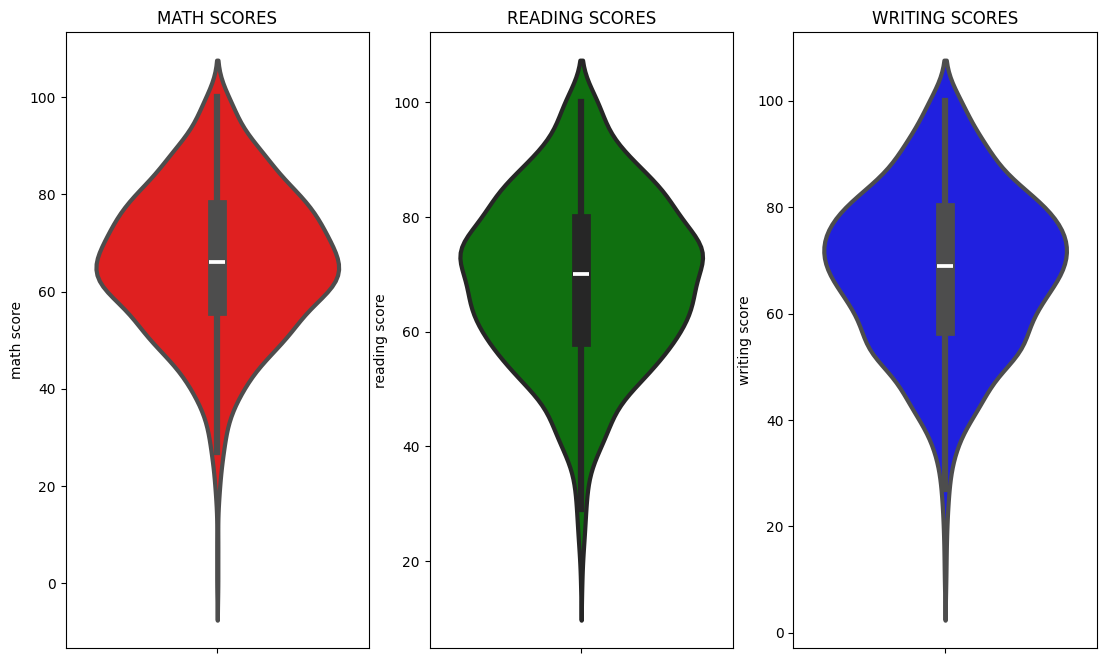

In [135]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
* Similar shapes across all three subject exams.

### 4.3. Multivariate Analysis Using Pieplot

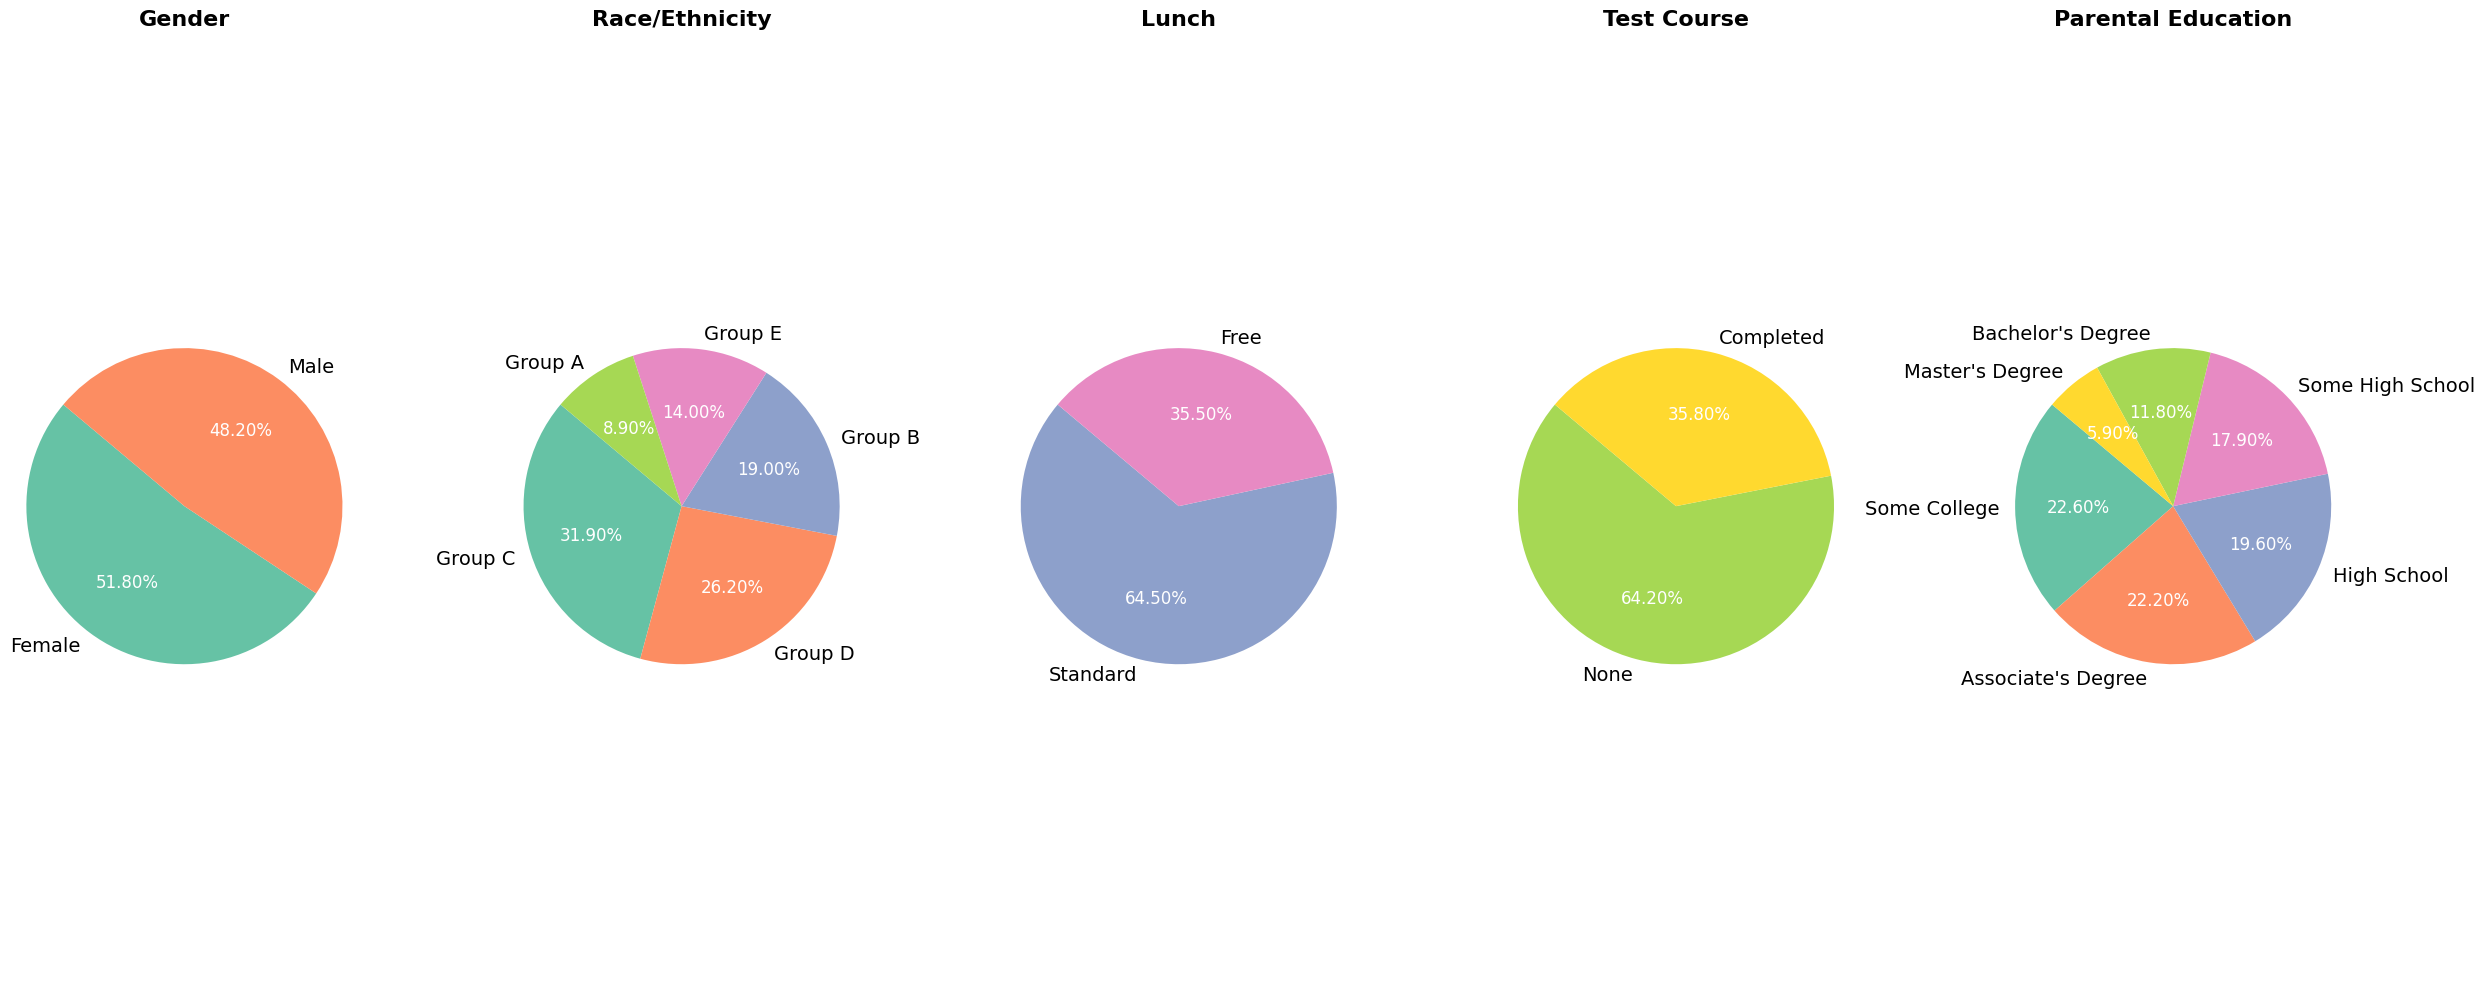

In [149]:
def plot_pie_chart(ax, data, labels, colors, title):
    size = data.value_counts()
    wedges, texts, autotexts = ax.pie(size, colors=colors, labels=labels, autopct='%.2f%%', textprops={'fontsize': 12}, startangle=140)
    for text in texts:
        text.set_fontsize(14)
    for autotext in autotexts:
        autotext.set_color('white')
    ax.set_title(title, fontsize=16, weight='bold')
    ax.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Set a professional color palette
palette = sns.color_palette("Set2")

# Assign specific colors to each plot for consistency
gender_colors = [palette[0], palette[1]]
race_colors = palette[:5]
lunch_colors = [palette[2], palette[3]]
test_course_colors = [palette[4], palette[5]]
parental_education_colors = palette[:6]

plt.rcParams['figure.figsize'] = (25, 10)
fig, axes = plt.subplots(1, 5)

plot_pie_chart(axes[0], df['gender'], ['Female', 'Male'], gender_colors, 'Gender')
plot_pie_chart(axes[1], df['race/ethnicity'], ['Group C', 'Group D', 'Group B', 'Group E', 'Group A'], race_colors, 'Race/Ethnicity')
plot_pie_chart(axes[2], df['lunch'], ['Standard', 'Free'], lunch_colors, 'Lunch')
plot_pie_chart(axes[3], df['test preparation course'], ['None', 'Completed'], test_course_colors, 'Test Course')
plot_pie_chart(axes[4], df['parental level of education'], ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"], parental_education_colors, 'Parental Education')

plt.tight_layout()
plt.show()

#### Insights
* Number of Male and Female students is almost equal
* Number students are greatest in Group C (31.90%)
* Number of students who have standard lunch are greater (64.50%)
* Number of students who have not enrolled in any test preparation course is greater (64.20%)
* Number of students whose parental education is "Some College" (22.60%) is greater followed closely by "Associate's Degree" (22.20%)

### 4.4. Feature Wise Visualization/Analysis

#### 4.4.1 Gender
* How is distribution of Gender ?
* Is gender has any impact on student's performance ?

##### UNIVARIATE ANALYSIS

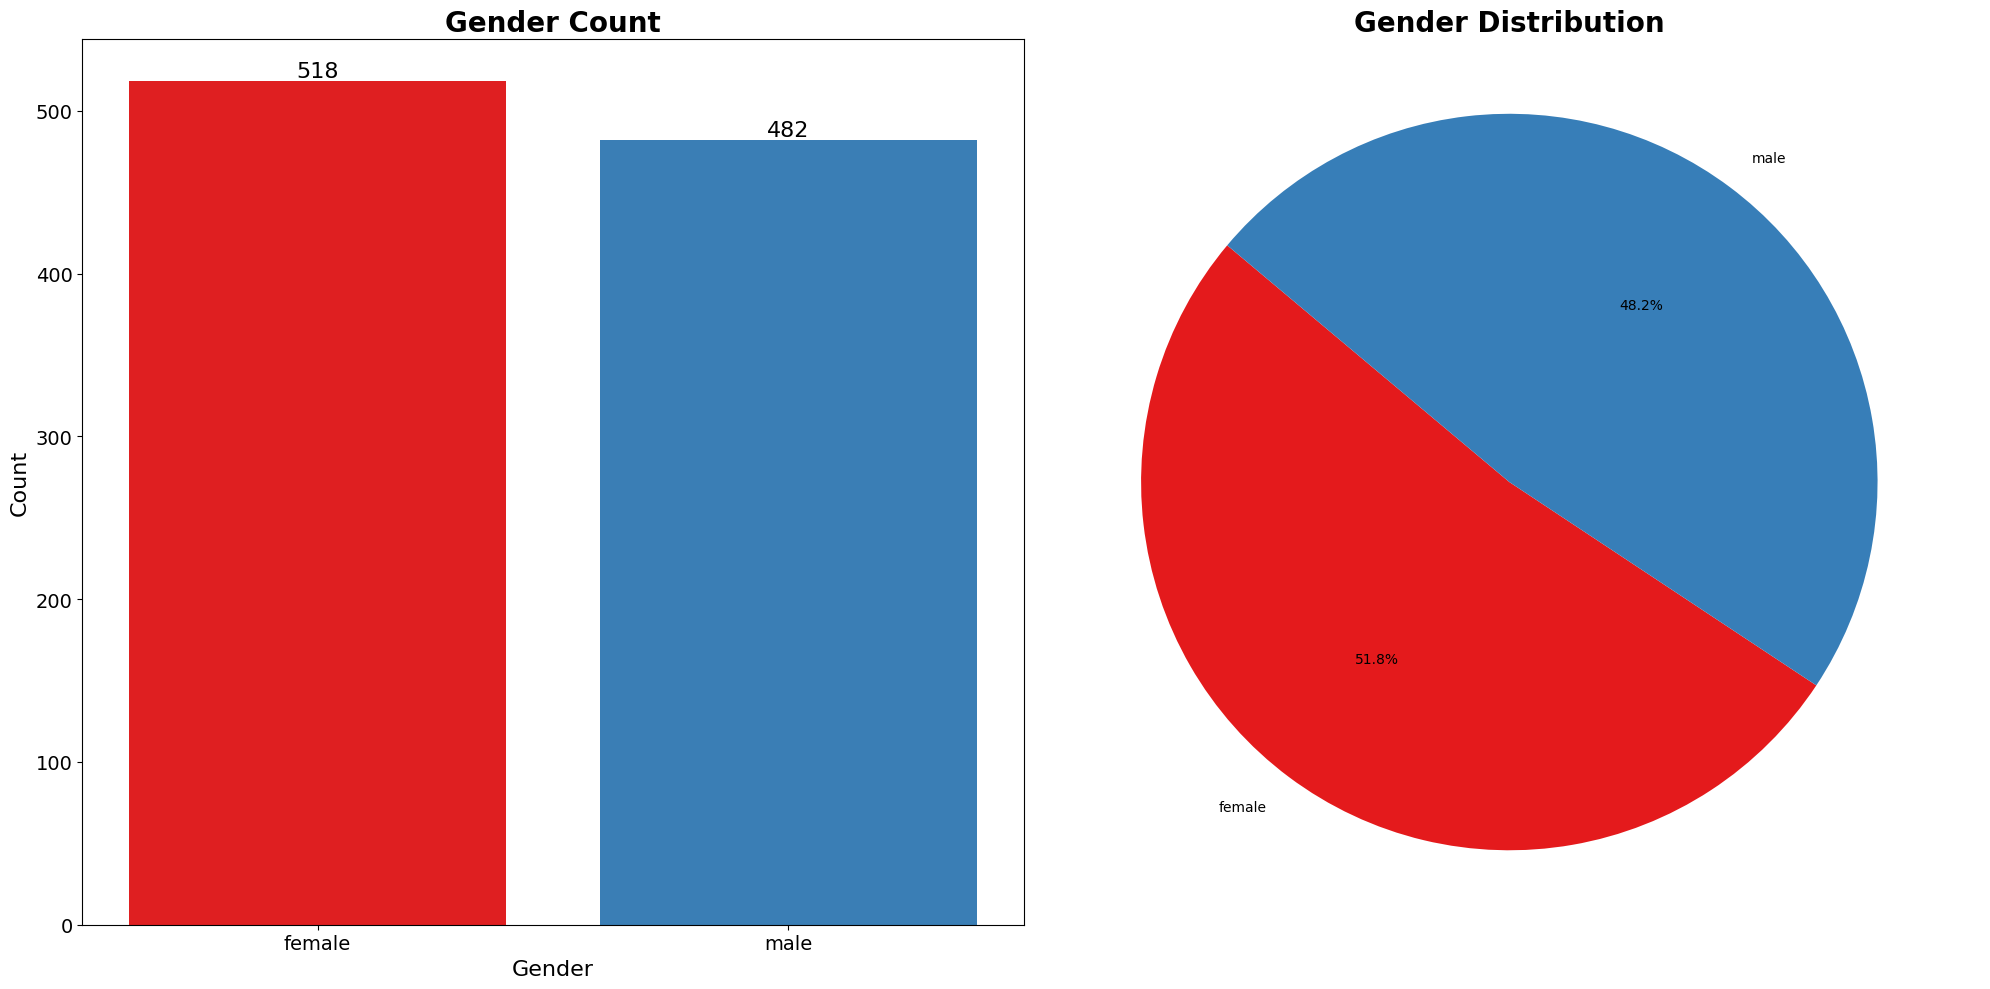

In [163]:
palette = sns.color_palette("Set1")

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# countplot for gender
sns.countplot(x=df['gender'], palette=palette, ax=ax[0], saturation=0.95)
ax[0].set_title('Gender Count', fontsize=20, weight='bold')
ax[0].set_xlabel('Gender', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].tick_params(axis='both', labelsize=14)

for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge', color='black', size=16)

# Pie chart for gender
gender_counts = df['gender'].value_counts()
ax[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=palette[:2], startangle=140)
ax[1].set_title('Gender Distribution', fontsize=20, weight='bold')
ax[1].axis('equal') 

plt.tight_layout()
plt.show()


#### Insights
* Gender has relatively balanced data with female students are 518 (48%) and male students are 482 (52%)

##### BIVARIATE ANALYSIS

In [169]:
numeric_df = df.select_dtypes(include='number')
gender_group = numeric_df.groupby(df['gender']).mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


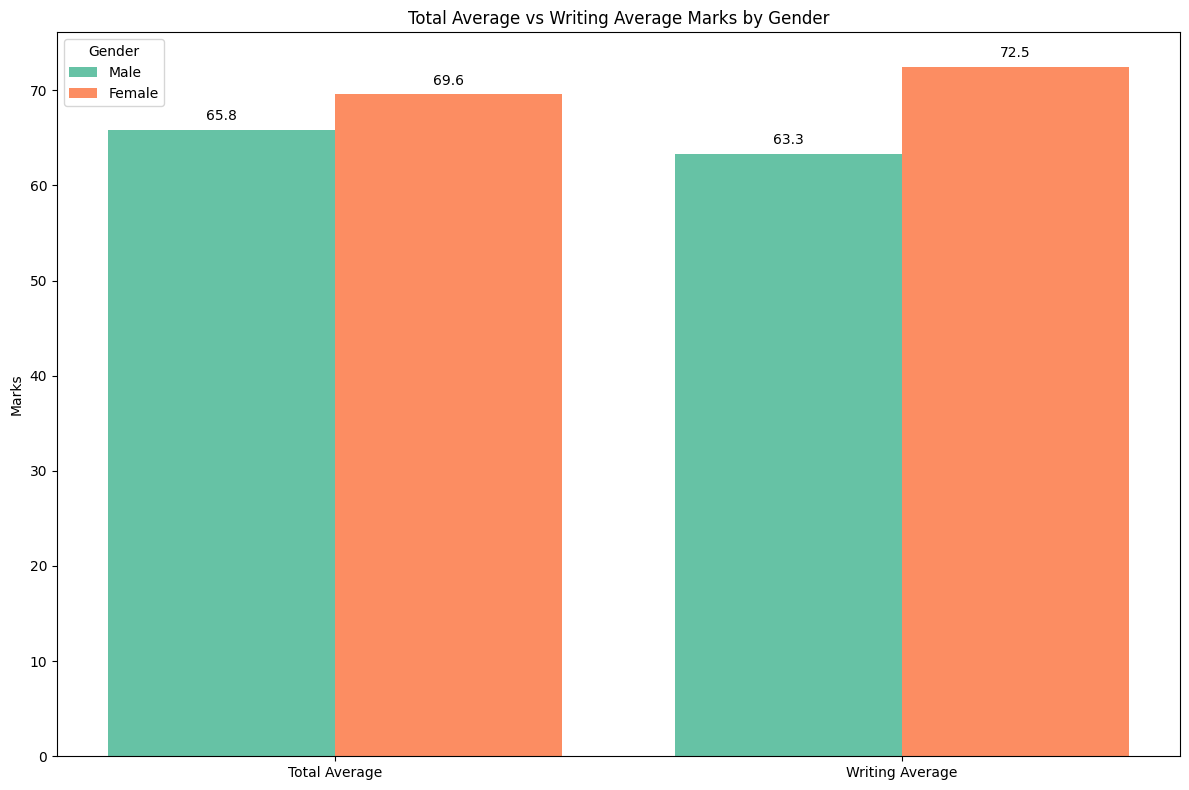

In [181]:
# Data preparation
X = ['Total Average', 'Writing Average']
female_scores = [gender_group['average'][0], gender_group['writing score'][0]]
male_scores = [gender_group['average'][1], gender_group['writing score'][1]]
X_axis = np.arange(len(X))

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.4
colors = sns.color_palette("Set2")

ax.bar(X_axis - bar_width/2, male_scores, bar_width, label='Male', color=colors[0])
ax.bar(X_axis + bar_width/2, female_scores, bar_width, label='Female', color=colors[1])

# Customizations
ax.set_xticks(X_axis)
ax.set_xticklabels(X)
ax.set_ylabel("Marks")
ax.set_title("Total Average vs Writing Average Marks by Gender")
ax.legend(title="Gender")
for i in range(len(X)):
    ax.text(i - bar_width/2, male_scores[i] + 1, f'{male_scores[i]:.1f}', ha='center')
    ax.text(i + bar_width/2, female_scores[i] + 1, f'{female_scores[i]:.1f}', ha='center')

plt.tight_layout()
plt.show()


In [189]:
gender_group = gender_group.drop(columns=['total score'])

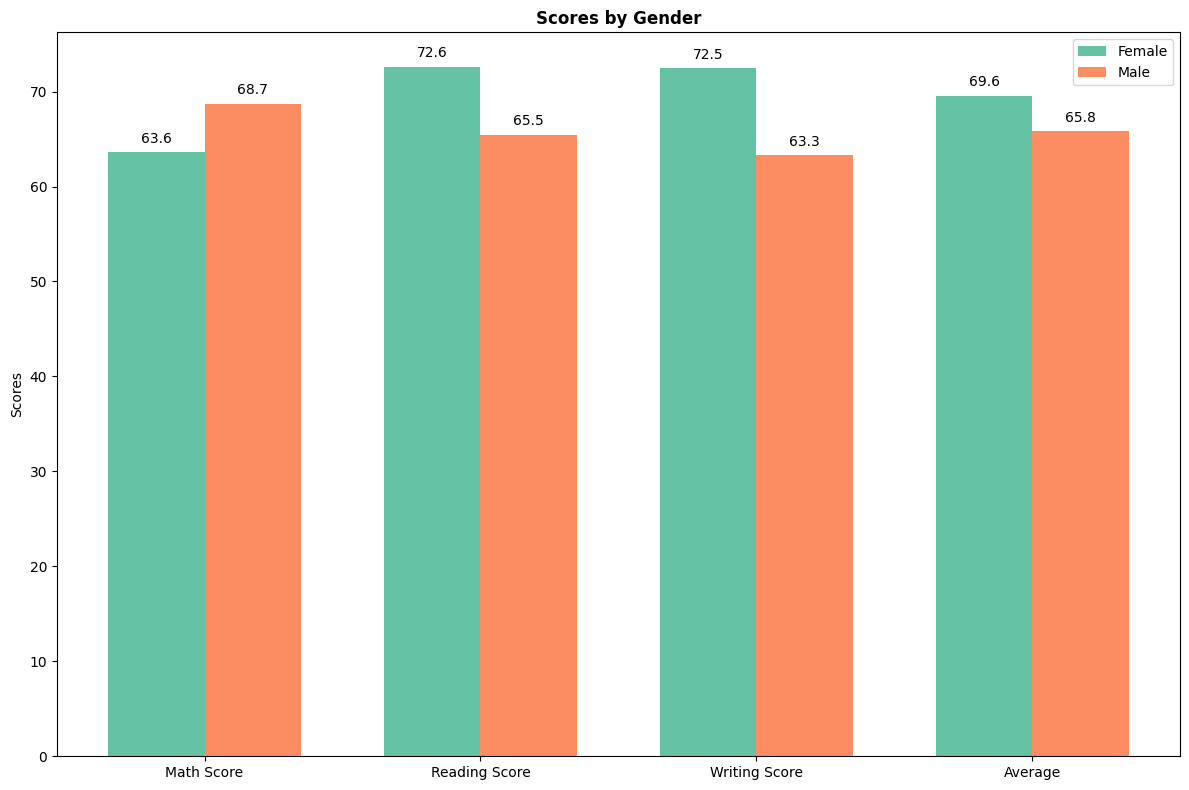

In [191]:
# Data preparation
metrics = ['Math Score', 'Reading Score', 'Writing Score', 'Average']
scores = gender_group.T
X_axis = np.arange(len(metrics))
bar_width = 0.35
colors = sns.color_palette("Set2")

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(X_axis - bar_width/2, scores['female'], bar_width, label='Female', color=colors[0])
ax.bar(X_axis + bar_width/2, scores['male'], bar_width, label='Male', color=colors[1])

# Customizations
ax.set_xticks(X_axis)
ax.set_xticklabels(metrics)
ax.set_ylabel("Scores")
ax.set_title("Scores by Gender", fontweight='bold')
ax.legend()

# Adding value annotations
for i in X_axis:
    ax.text(i - bar_width/2, scores['female'][i] + 1, f'{scores["female"][i]:.1f}', ha='center')
    ax.text(i + bar_width/2, scores['male'][i] + 1, f'{scores["male"][i]:.1f}', ha='center')

plt.tight_layout()
plt.show()


#### Insights
* On an average females have a better overall score than men (including for reading and writing scores).
* When comparing average scores across the three subjects, males scored higher in Maths.

Continue Uni/Bi-variate Analysis for Other Features for Real Projects

### 4.5. Checking Outliers

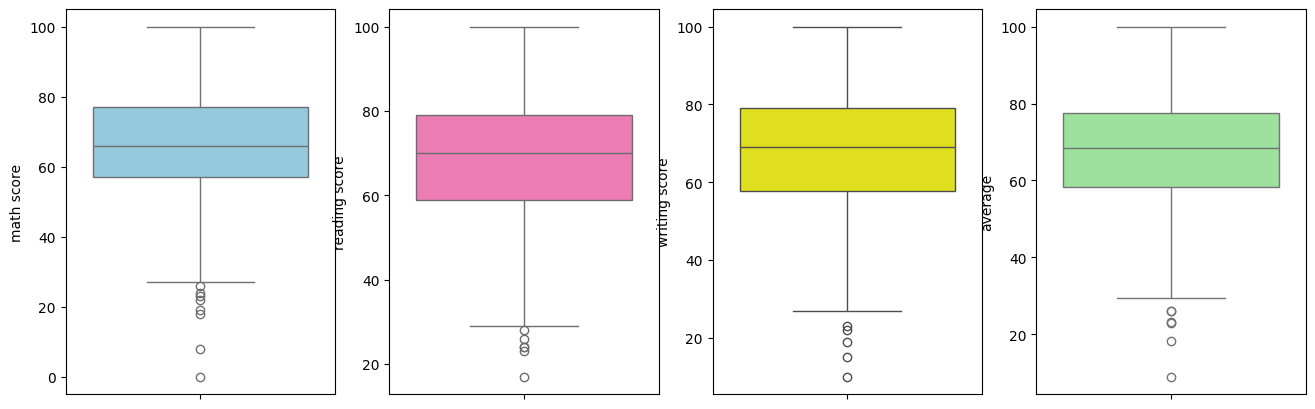

In [192]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

In [199]:
from sklearn.ensemble import IsolationForest

data1 = df[['math score']] 

# Fit Isolation Forest model
model = IsolationForest(contamination=0.01) 
data1['outlier'] = model.fit_predict(data1)

# Identify outliers
outliers = data1[data1['outlier'] == -1]
print("Outliers detected by Isolation Forest method:")
print(outliers)

Outliers detected by Isolation Forest method:
     math score  outlier
17           18       -1
59            0       -1
145          22       -1
787          19       -1
842          23       -1
980           8       -1


#### 4.5. MUTIVARIATE ANALYSIS USING PAIRPLOT

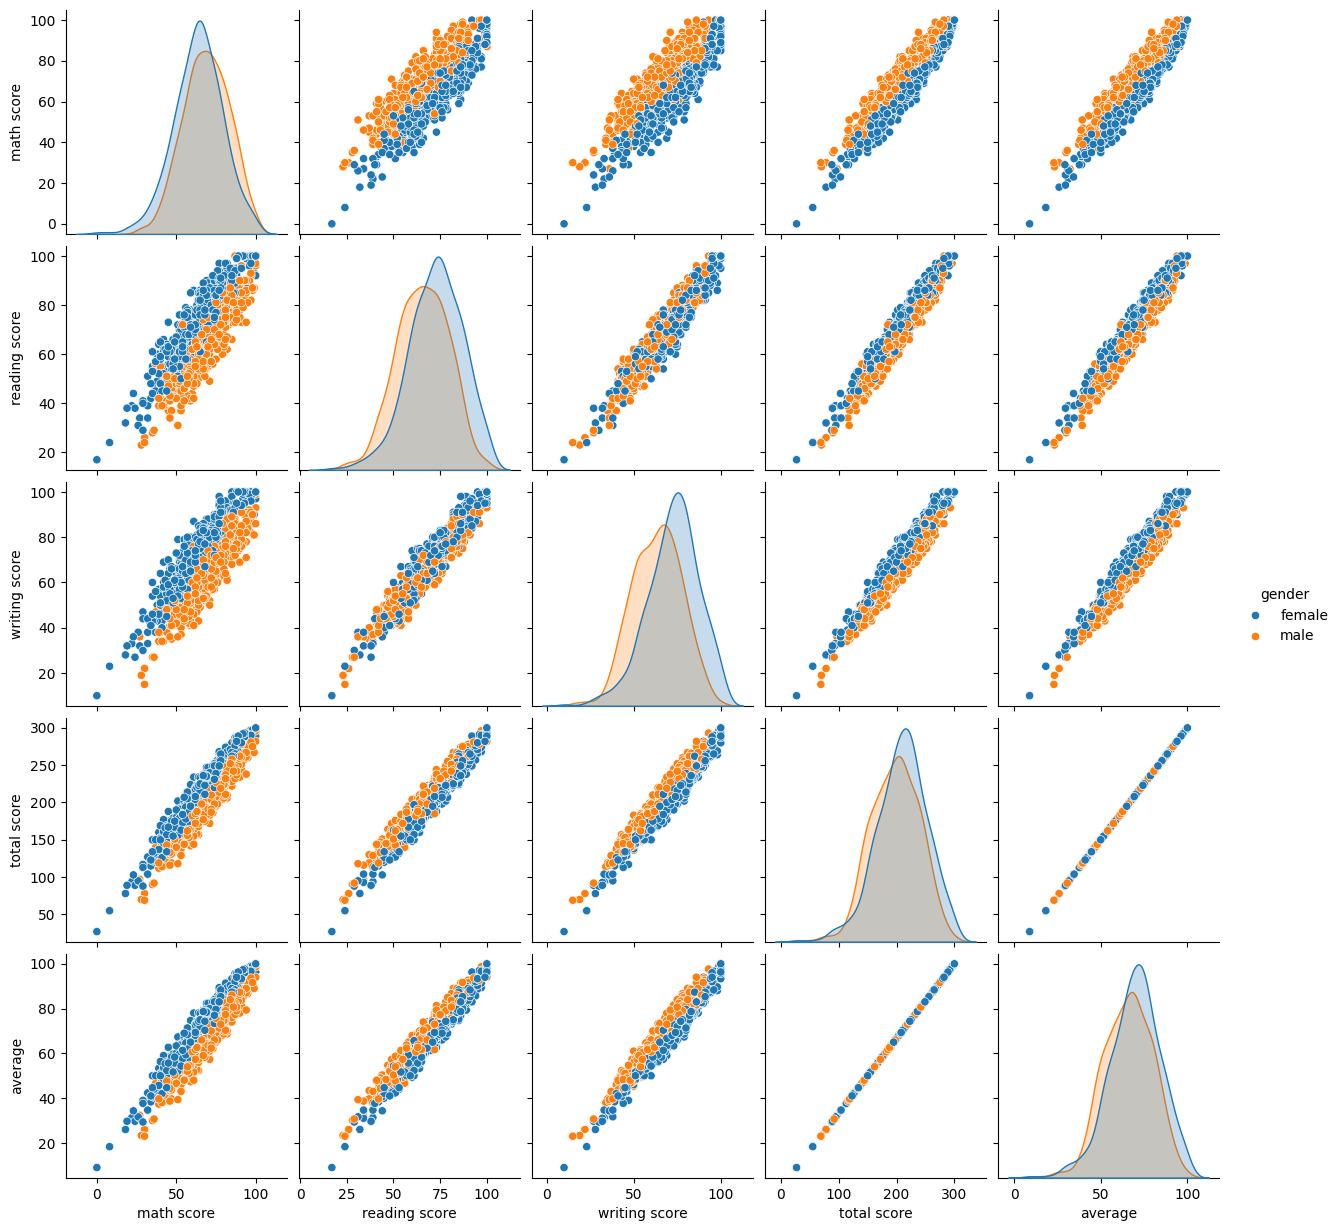

In [202]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
* All scores increase linearly with each other

### 5. Conclusions [limited]
* Student's Performance is found to be related with lunch, parental level education, and gender.
* Females lead in top scores on average, while males lead in top scores in mathematics.